# Clustering of DamID chromatin proteins

## Background

After seeing a gazillion tSNE single cell plots I thought that maybe we could try clustering
the GATC sites based on the DamID fusion proteins occupancy.

There's a new and improved method for clustering called [UMAP](https://umap-learn.readthedocs.io/en/latest/), 
that has been used for [single cell seq](https://www.nature.com/articles/nbt.4314)
and that is more robost and interpretable than tSNE, so I tried this.

# Code

I've added this as a new method to [seaplotlib](https://github.com/mvdbeek/seaplotlib),
which is the repository where I collect reusable things for plotting.


In [1]:
import os
import matplotlib
%matplotlib inline
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
DIR = 'deseq2 datasets/'
LOG2_COLUMN = 2


from seaplotlib import umap_plot

df_final = umap_plot.read_data_from_direcotry(DIR)
if os.path.exists('umap_embedding.tab'):
    print('loading embedding')
    embedding = umap_plot.load_embedding('umap_embedding.tab')
else:
    print('creating embedding')
    reducer, embedding = umap_plot.fit_transform(df=df_final)
    embedding = umap_plot.save_embedding('umap_embedding.tab')

/Users/mvandenb/src/seaplotlib/seaplotlib/__init__.py:5: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  matplotlib.use('Agg')


loading embedding


# Results

I used the log2 ratio estimated by DESeq2 on the individual GATC sites from the ISC datasets.
This is a small snippet of what the data looks like:

In [2]:
df_final[0:10]

,HP1,Brahma,Pol II,Polycomb,H1,Trr,Kismet
index,,,,,,,
2R_5174728_5174732,6.590948,-2.565163,-3.473927,-2.896193,2.107441,-4.523422,-0.509640
2R_2532694_2532698,5.716466,-2.048710,-3.223858,-2.352370,0.736827,-5.467363,-4.594118
3L_28054292_28054296,5.844294,-1.123677,-1.597191,-0.275509,1.899419,-3.188053,-0.498245
3L_27161256_27161260,5.721734,-2.401735,-1.734159,-1.681268,1.366390,-3.436530,-2.681684
2R_5606541_5606545,5.816215,-1.500357,-1.725578,-1.084640,0.635339,-2.165053,-2.124562
2R_5607328_5607332,5.666768,-1.534679,-1.715950,-0.647339,0.363357,-1.010691,-4.410984
2R_4231423_4231427,6.264082,-1.083928,-3.118869,-2.673859,2.242176,-3.490018,-1.953305
3L_23311853_23311857,5.844545,-1.803632,-3.401156,-2.133517,1.387941,-2.949568,-2.335932
2R_4567454_4567458,5.562548,-1.659724,-1.964080,-2.673079,1.242791,-3.884009,-2.192463


In [3]:
above_cutoff = df_final.abs() > 5
above_cutoff.sum()

HP1          233
Brahma         9
Pol II      1192
Polycomb     134
H1           563
Trr          778
Kismet      1944
dtype: int64

In [4]:
1944 / 151187

0.012858248394372532

In [5]:
df_final.min()

HP1        -6.775348
Brahma     -5.637079
Pol II     -7.112362
Polycomb   -7.811485
H1         -8.830875
Trr        -8.320481
Kismet     -7.610413
dtype: float64

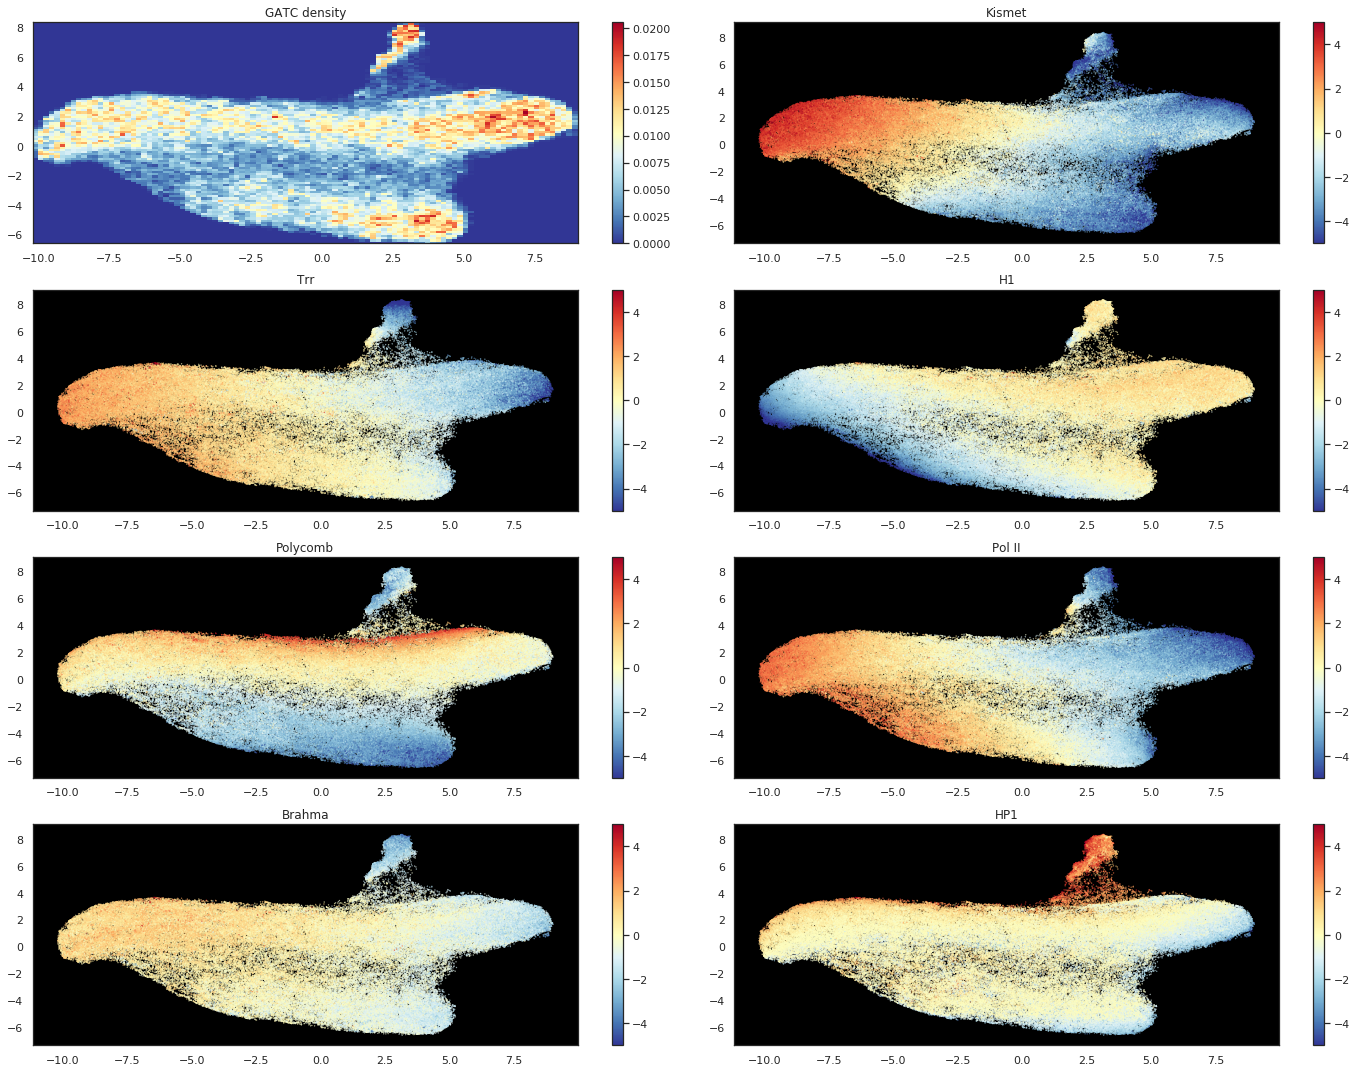

In [7]:
fig = umap_plot.plot_proteins(embedding=embedding, df=df_final, vmin=-5, vmax=5, auto_color_scale=False,)
fig.figure.savefig('umap_vmin_vmax_5_white.png')
for ax in fig.figure.axes:
    ax.set_facecolor('black')
fig.figure.savefig('umap_vmin_vmax_5_black.png')